In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import random

In [2]:
from functions_generate_playlist import (
    generate_basic_playlist,
    generate_stochastic_playlist, 
    generate_genre_guided_playlist,
    select_starting_song,
    display_playlist
)

from functions_metrics import (
    intra_list_diversity,
    genre_coverage,
    feature_variance
)

from functions_clustering import load_compressed_model

In [3]:
DATA_FP = 'data_music_features/25-03-12_processed_spotify_sample.csv'
df = pd.read_csv(DATA_FP)
model = load_compressed_model('Baseline', 'models/25-03-07')
G = nx.read_graphml("models/25-03-13/music_genre_graph.graphml")
feature_cols = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                        'valence', 'tempo', 'time_signature', 'encoded_genre']

In [27]:
seed = 42
if seed is not None:
    random.seed(seed)
    np.random.seed(seed)
num_playlists = 30

metric_values = {'basic': 
                 {'intra_list_diversity': [], 
                  'genre_coverage' : [], 
                  'feature_variance': []},
                 'stochastic':
                 {'intra_list_diversity': [],
                  'genre_coverage': [],
                  'feature_variance': []},
                 'genre_guided':
                 {'intra_list_diversity': [],
                  'genre_coverage': [],
                  'feature_variance': []}
                } 

for _ in range(num_playlists):
    starting_song_index = select_starting_song(df)
    while df.iloc[starting_song_index]['track_genre'] not in np.array(G.nodes.data())[:,0]:
        starting_song_index = select_starting_song(df)
        print(starting_song_index)
    
    playlist = generate_basic_playlist(df, model, starting_song_index, 16)
    playlist_df = pd.DataFrame(playlist)
    metric_values['basic']['intra_list_diversity'].append(intra_list_diversity(playlist_df, feature_cols))
    metric_values['basic']['genre_coverage'].append(genre_coverage(playlist_df, df))
    metric_values['basic']['feature_variance'].append(feature_variance(playlist_df, feature_cols))

    playlist = generate_stochastic_playlist(df, model, starting_song_index, 16)
    playlist_df = pd.DataFrame(playlist)
    metric_values['stochastic']['intra_list_diversity'].append(intra_list_diversity(playlist_df, feature_cols))
    metric_values['stochastic']['genre_coverage'].append(genre_coverage(playlist_df, df))
    metric_values['stochastic']['feature_variance'].append(feature_variance(playlist_df, feature_cols))

    playlist = generate_genre_guided_playlist(df, model, G, starting_song_index, 16)
    playlist_df = pd.DataFrame(playlist)
    metric_values['genre_guided']['intra_list_diversity'].append(intra_list_diversity(playlist_df, feature_cols))
    metric_values['genre_guided']['genre_coverage'].append(genre_coverage(playlist_df, df))
    metric_values['genre_guided']['feature_variance'].append(feature_variance(playlist_df, feature_cols))

metric_values

Genre transition path: ['club', 'party', 'edm', 'club', 'edm', 'trance', 'hardstyle', 'trance', 'detroit-techno', 'trance', 'house', 'hardstyle', 'edm', 'detroit-techno', 'edm', 'club', 'party']
Genre transition path: ['sertanejo', 'brazil', 'sertanejo', 'brazil', 'mpb', 'brazil', 'sertanejo', 'brazil', 'sertanejo', 'brazil', 'sertanejo', 'brazil', 'pagode', 'brazil', 'sertanejo', 'brazil', 'sertanejo']
Genre transition path: ['party', 'club', 'party', 'club', 'party', 'club', 'party', 'club', 'party', 'club', 'edm', 'idm', 'techno', 'detroit-techno', 'edm', 'electro', 'techno']
Genre transition path: ['disco', 'synth-pop', 'disco', 'soul', 'r-n-b', 'soul', 'afrobeat', 'funk', 'soul', 'r-n-b', 'funk', 'r-n-b', 'soul', 'afrobeat', 'funk', 'soul', 'disco']
Genre transition path: ['progressive-house', 'house', 'progressive-house', 'house', 'deep-house', 'house', 'progressive-house', 'house', 'electro', 'detroit-techno', 'trance', 'hardstyle', 'house', 'j-dance', 'house', 'progressive-hous

{'basic': {'intra_list_diversity': [np.float64(3.012184431656281),
   np.float64(2.729040875360464),
   np.float64(2.2627589450156536),
   np.float64(3.070107753161157),
   np.float64(2.865720631505342),
   np.float64(2.8501333396566277),
   np.float64(3.7155087656833152),
   np.float64(2.6956858328552684),
   np.float64(2.782573303375972),
   np.float64(2.6482299600408026),
   np.float64(3.3625139355299525),
   np.float64(2.621131454032532),
   np.float64(2.7241844873302123),
   np.float64(3.222232633653879),
   np.float64(3.0310233092714944),
   np.float64(2.8565978843675377),
   np.float64(3.230953920276699),
   np.float64(2.862785088056131),
   np.float64(2.9441455044153773),
   np.float64(3.186319393724393),
   np.float64(2.5972001645237546),
   np.float64(2.5132568539686653),
   np.float64(2.6386077371215304),
   np.float64(3.191425215150695),
   np.float64(2.8952762893213646),
   np.float64(2.730461966548039),
   np.float64(2.9688964170206322),
   np.float64(3.0550994761927965),

In [28]:
method_stats = {'basic': 
                 {'intra_list_diversity': 0, 
                  'genre_coverage' : 0, 
                  'feature_variance': 0},
                 'stochastic':
                 {'intra_list_diversity': 0,
                  'genre_coverage': 0,
                  'feature_variance': 0},
                 'genre_guided':
                 {'intra_list_diversity': 0,
                  'genre_coverage': 0,
                  'feature_variance': 0}
                } 

for method in metric_values.keys():
    for metric in metric_values[method].keys():
        average = np.mean(metric_values[method][metric])
        range = (min(metric_values[method][metric]), max(metric_values[method][metric]))
        method_stats[method][metric] = {'average': average, 'range': range}

method_stats

{'basic': {'intra_list_diversity': {'average': np.float64(2.898595323501375),
   'range': (np.float64(2.2627589450156536), np.float64(3.7155087656833152))},
  'genre_coverage': {'average': np.float64(0.05185185185185186),
   'range': (0.030303030303030304, 0.0707070707070707)},
  'feature_variance': {'average': np.float64(0.3495973389169214),
   'range': (np.float64(0.20637469020279015),
    np.float64(0.5642303754497513))}},
 'stochastic': {'intra_list_diversity': {'average': np.float64(3.067121577709089),
   'range': (np.float64(2.2686045208918935), np.float64(3.627085696404842))},
  'genre_coverage': {'average': np.float64(0.054545454545454564),
   'range': (0.04040404040404041, 0.0707070707070707)},
  'feature_variance': {'average': np.float64(0.3927255661803018),
   'range': (np.float64(0.21266859734964777),
    np.float64(0.5458595502104039))}},
 'genre_guided': {'intra_list_diversity': {'average': np.float64(29.91243692194856),
   'range': (np.float64(11.905655873243672), np.flo

In [30]:
import matplotlib.pyplot as plt

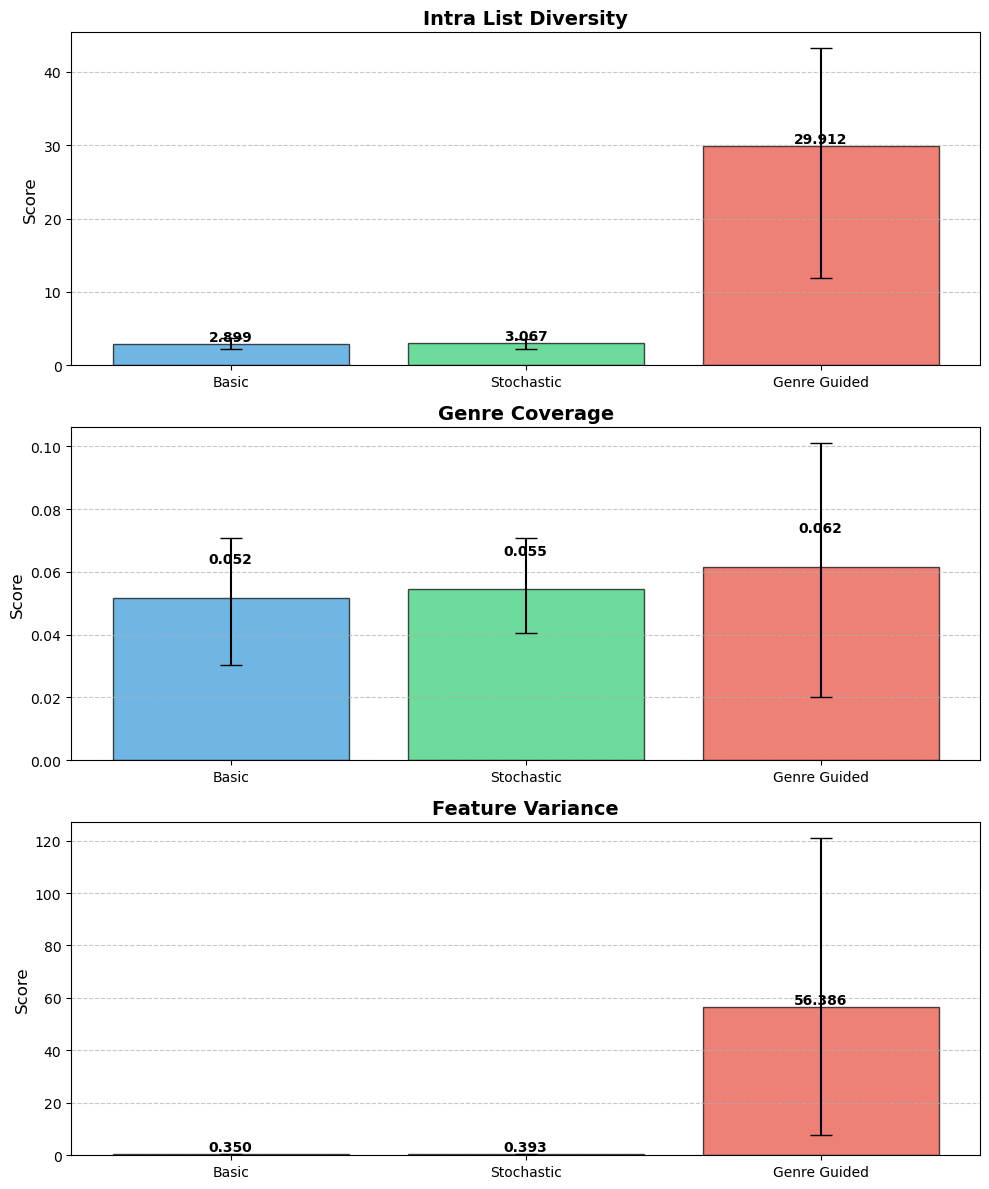

In [31]:
all_results = method_stats
# Prepare data for plotting
metrics = list(next(iter(all_results.values())).keys())
generators = list(all_results.keys())
generator_labels = [name.replace('_', ' ').title() for name in generators]

# Create figure with subplots (one per metric)
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 4*len(metrics)))

# Use a color palette for better distinction
colors = ['#3498db', '#2ecc71', '#e74c3c']

for i, metric in enumerate(metrics):
    # Extract data for this metric
    values = [all_results[gen][metric]['average'] for gen in generators]
    min_vals = [all_results[gen][metric]['range'][0] for gen in generators]
    max_vals = [all_results[gen][metric]['range'][1] for gen in generators]
    
    # Calculate error bars
    yerr = np.array([
        [v - min_v for v, min_v in zip(values, min_vals)],  # lower errors
        [max_v - v for v, max_v in zip(values, max_vals)]   # upper errors
    ])
    
    # Create bar chart
    bars = axes[i].bar(
        generator_labels, values, 
        yerr=yerr, capsize=8, 
        color=colors, alpha=0.7,
        edgecolor='black', linewidth=1
    )
    
    # Improve aesthetics
    axes[i].set_title(
        metric.replace('_', ' ').title(), 
        fontsize=14, fontweight='bold'
    )
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim(bottom=0)
    axes[i].set_ylabel('Score', fontsize=12)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width()/2., 
            height + 0.01,
            f'{value:.3f}', 
            ha='center', va='bottom',
            fontweight='bold'
        )

plt.tight_layout()
plt.savefig("playlist_evaluation_results.png", dpi=300, bbox_inches='tight')
plt.show()